In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [3]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False)

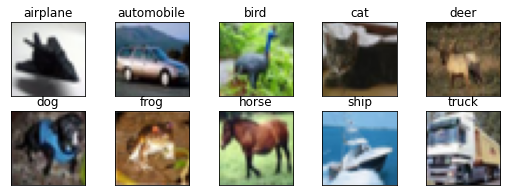

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F749A4DBE20>


In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(9,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()
print(img)

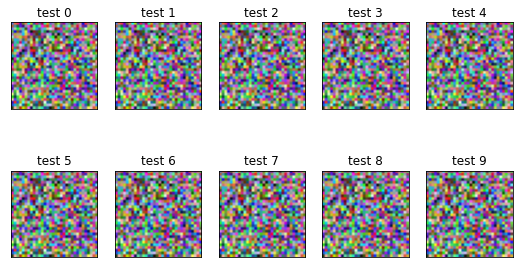

In [13]:
import numpy as np
fig = plt.figure(figsize=(9, 5))
img = np.random.randint(0, 256, size=[32, 32, 3])
# img = torch.randn([32, 32, 3])
# img = torch.randint(0, 256, size=[32, 32, 3])
for i in range(10):
    # add_subplot(nrows, ncols, index, **kwargs)
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.set_title("test "+str(i))
    plt.imshow(img)
plt.show()

In [4]:
type(cifar10)

torchvision.datasets.cifar.CIFAR10

In [5]:
isinstance(cifar10, torch.utils.data.Dataset)

True

In [6]:
len(cifar10)

50000

<PIL.Image.Image image mode=RGB size=32x32 at 0x1F6DE27C470>


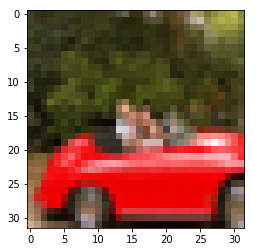

In [7]:
img, label = cifar10[99]
print(img)
plt.imshow(img)
plt.show()

In [8]:
print(img)

<PIL.Image.Image image mode=RGB size=32x32 at 0x1F6DE27C470>


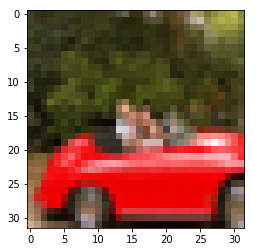

In [9]:
plt.imshow(img)
plt.show()

In [10]:
label

1

In [11]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [10]:
from torchvision import transforms
import numpy as np

to_tensor = transforms.ToTensor()

img, label = cifar10[99]

print(np.array(img).shape)
print(np.array(img).dtype)
print(np.array(img)[:,:,0])

img_t = to_tensor(img)

print("\n", img_t.shape)
print(img_t.dtype)
print(img_t[0])

(32, 32, 3)
uint8
[[ 62  50  46 ... 167 183 137]
 [ 63  55  52 ... 163 171 145]
 [ 58  64  56 ... 153 150 123]
 ...
 [172 143 130 ...  94 141 139]
 [183 150  80 ...  81 135 143]
 [209 182 139 ...  59 130 169]]

 torch.Size([3, 32, 32])
torch.float32
tensor([[0.2431, 0.1961,  ..., 0.7176, 0.5373],
        [0.2471, 0.2157,  ..., 0.6706, 0.5686],
        ...,
        [0.7176, 0.5882,  ..., 0.5294, 0.5608],
        [0.8196, 0.7137,  ..., 0.5098, 0.6627]])


In [13]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [14]:
img, _ = cifar10[99]
type(img)

torch.Tensor

In [15]:
img.shape

torch.Size([3, 32, 32])

In [16]:
img.dtype

torch.float32

In [17]:
img.min(), img.max()

(tensor(0.), tensor(1.))

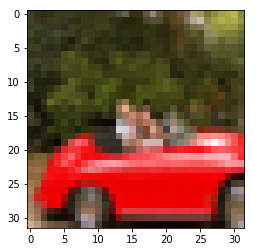

In [18]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [19]:
imgs = torch.stack([img for img, _ in cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [20]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [21]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [22]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [23]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [24]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


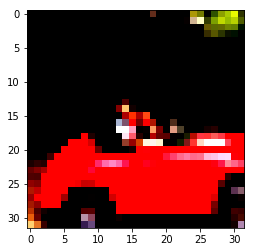

In [25]:
img, _ = cifar10[99]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [26]:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [27]:
import torch.nn as nn

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2))

In [28]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [29]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [30]:
softmax(x).sum()

tensor(1.)

In [31]:
import torch
import torch.nn as nn

torch.manual_seed(123)

softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [32]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


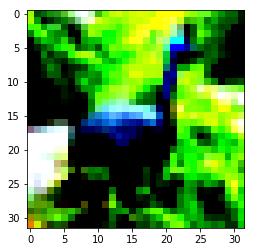

In [33]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [34]:
img_batch = img.view(-1).unsqueeze(0)

In [35]:
out = model(img_batch)
out

tensor([[0.3700, 0.6300]], grad_fn=<SoftmaxBackward>)

In [36]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [37]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [38]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [39]:
log_softmax(x)

tensor([[-104.,    0.]])

In [40]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

In [41]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [42]:
loss = nn.NLLLoss()

In [43]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.6509, grad_fn=<NllLossBackward>)

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 6.085078
Epoch: 1, Loss: 7.642984
Epoch: 2, Loss: 7.857845
Epoch: 3, Loss: 10.936703
Epoch: 4, Loss: 5.475904
Epoch: 5, Loss: 4.957893
Epoch: 6, Loss: 6.895187
Epoch: 7, Loss: 10.755869
Epoch: 8, Loss: 12.918125
Epoch: 9, Loss: 4.106812
Epoch: 10, Loss: 6.995234
Epoch: 11, Loss: 13.307779
Epoch: 12, Loss: 11.295286
Epoch: 13, Loss: 11.715748
Epoch: 14, Loss: 5.716065
Epoch: 15, Loss: 12.081475
Epoch: 16, Loss: 13.451443
Epoch: 17, Loss: 7.890855
Epoch: 18, Loss: 9.953497
Epoch: 19, Loss: 8.284361
Epoch: 20, Loss: 0.169342
Epoch: 21, Loss: 10.418673
Epoch: 22, Loss: 15.180997
Epoch: 23, Loss: 9.269197
Epoch: 24, Loss: 7.858950
Epoch: 25, Loss: 13.322937
Epoch: 26, Loss: 11.278272
Epoch: 27, Loss: 5.976104
Epoch: 28, Loss: 17.907284
Epoch: 29, Loss: 1.840534
Epoch: 30, Loss: 11.822458
Epoch: 31, Loss: 5.583863
Epoch: 32, Loss: 8.620731
Epoch: 33, Loss: 14.190363
Epoch: 34, Loss: 13.488304
Epoch: 35, Loss: 10.535601
Epoch: 36, Loss: 8.254050
Epoch: 37, Loss: 0.261973
Epoch

In [45]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.379931
Epoch: 1, Loss: 0.510971
Epoch: 2, Loss: 0.447792
Epoch: 3, Loss: 0.653534
Epoch: 4, Loss: 0.447541
Epoch: 5, Loss: 0.291345
Epoch: 6, Loss: 0.486947
Epoch: 7, Loss: 0.270207
Epoch: 8, Loss: 0.547912
Epoch: 9, Loss: 0.238432
Epoch: 10, Loss: 0.257918
Epoch: 11, Loss: 0.356446
Epoch: 12, Loss: 0.538808
Epoch: 13, Loss: 0.226758
Epoch: 14, Loss: 0.299214
Epoch: 15, Loss: 0.311655
Epoch: 16, Loss: 0.138688
Epoch: 17, Loss: 0.289396
Epoch: 18, Loss: 0.329703
Epoch: 19, Loss: 0.491818
Epoch: 20, Loss: 0.121620
Epoch: 21, Loss: 0.239407
Epoch: 22, Loss: 0.256800
Epoch: 23, Loss: 0.362643
Epoch: 24, Loss: 0.146391
Epoch: 25, Loss: 0.224057
Epoch: 26, Loss: 0.317490
Epoch: 27, Loss: 0.242224
Epoch: 28, Loss: 0.189765
Epoch: 29, Loss: 0.247376
Epoch: 30, Loss: 0.152678
Epoch: 31, Loss: 0.370835
Epoch: 32, Loss: 0.170147
Epoch: 33, Loss: 0.153687
Epoch: 34, Loss: 0.224271
Epoch: 35, Loss: 0.091529
Epoch: 36, Loss: 0.133091
Epoch: 37, Loss: 0.123274
Epoch: 38, Loss: 0.120

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.326693
Epoch: 1, Loss: 0.394001
Epoch: 2, Loss: 0.328502
Epoch: 3, Loss: 0.178092
Epoch: 4, Loss: 0.364719
Epoch: 5, Loss: 0.454674
Epoch: 6, Loss: 0.548658
Epoch: 7, Loss: 0.352326
Epoch: 8, Loss: 0.636690
Epoch: 9, Loss: 0.390800
Epoch: 10, Loss: 0.355435
Epoch: 11, Loss: 0.222640
Epoch: 12, Loss: 0.202111
Epoch: 13, Loss: 0.172411
Epoch: 14, Loss: 0.271181
Epoch: 15, Loss: 0.219212
Epoch: 16, Loss: 0.613340
Epoch: 17, Loss: 0.204373
Epoch: 18, Loss: 0.314177
Epoch: 19, Loss: 0.236539
Epoch: 20, Loss: 0.180212
Epoch: 21, Loss: 0.297169
Epoch: 22, Loss: 0.147050
Epoch: 23, Loss: 0.395495
Epoch: 24, Loss: 0.217830
Epoch: 25, Loss: 0.346799
Epoch: 26, Loss: 0.122175
Epoch: 27, Loss: 0.310462
Epoch: 28, Loss: 0.117975
Epoch: 29, Loss: 0.108739
Epoch: 30, Loss: 0.289741
Epoch: 31, Loss: 0.162111
Epoch: 32, Loss: 0.343498
Epoch: 33, Loss: 0.067240
Epoch: 34, Loss: 0.145010
Epoch: 35, Loss: 0.326151
Epoch: 36, Loss: 0.075940
Epoch: 37, Loss: 0.142854
Epoch: 38, Loss: 0.160

In [48]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.999700


In [49]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.818000


In [50]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [51]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.467440
Epoch: 1, Loss: 0.546665
Epoch: 2, Loss: 0.235942
Epoch: 3, Loss: 0.552646
Epoch: 4, Loss: 0.438913
Epoch: 5, Loss: 0.405718
Epoch: 6, Loss: 0.651299
Epoch: 7, Loss: 0.365505
Epoch: 8, Loss: 0.202632
Epoch: 9, Loss: 0.583006
Epoch: 10, Loss: 0.558033
Epoch: 11, Loss: 0.271199
Epoch: 12, Loss: 0.385183
Epoch: 13, Loss: 0.509575
Epoch: 14, Loss: 0.445199
Epoch: 15, Loss: 0.341095
Epoch: 16, Loss: 0.433102
Epoch: 17, Loss: 0.606591
Epoch: 18, Loss: 0.261556
Epoch: 19, Loss: 0.388963
Epoch: 20, Loss: 0.314825
Epoch: 21, Loss: 0.200921
Epoch: 22, Loss: 0.257796
Epoch: 23, Loss: 0.440425
Epoch: 24, Loss: 0.600442
Epoch: 25, Loss: 0.460757
Epoch: 26, Loss: 0.788530
Epoch: 27, Loss: 0.327609
Epoch: 28, Loss: 0.194952
Epoch: 29, Loss: 0.240534
Epoch: 30, Loss: 0.114583
Epoch: 31, Loss: 1.155974
Epoch: 32, Loss: 0.187521
Epoch: 33, Loss: 0.234861
Epoch: 34, Loss: 0.171355
Epoch: 35, Loss: 0.366816
Epoch: 36, Loss: 0.610443
Epoch: 37, Loss: 0.072456
Epoch: 38, Loss: 0.066

In [53]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.999900


In [54]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.818000


In [55]:
sum([p.numel() for p in model.parameters()])

3737474

In [56]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [57]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1574402

In [58]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [59]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

In [60]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [61]:
conv = nn.Conv2d(3, 16, kernel_size=3)

In [62]:
conv.weight.shape

torch.Size([16, 3, 3, 3])

In [63]:
conv.bias.shape

torch.Size([16])

In [64]:
img, _ = cifar2[0]

output = conv(img.unsqueeze(0))

In [65]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


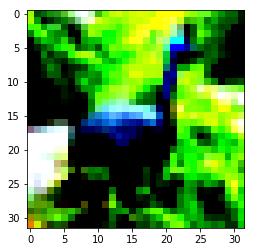

In [66]:
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.show()

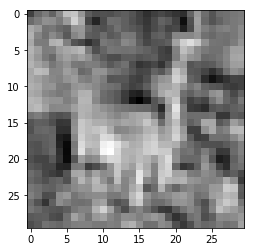

In [67]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [68]:
output.shape

torch.Size([1, 16, 30, 30])

In [69]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [70]:
output = conv(img.unsqueeze(0))

output.shape

torch.Size([1, 1, 32, 32])

In [71]:
with torch.no_grad():
    conv.bias.zero_()

In [72]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

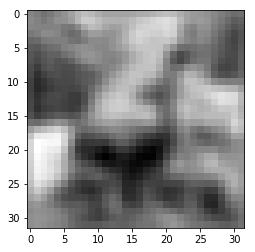

In [73]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [74]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

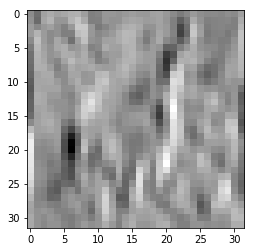

In [75]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [11]:
pool = nn.MaxPool2d(2)

NameError: name 'nn' is not defined

In [77]:
output = pool(img.unsqueeze(0))

output.shape

torch.Size([1, 3, 16, 16])

In [78]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2))

TypeError: ellipsis is not a Module subclass

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Flatten(),   # WARNING: something missing here
            nn.Linear(512, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [ ]:
sum([p.numel() for p in model.parameters()])

In [ ]:
model(img.unsqueeze(0))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = Net()

sum([p.numel() for p in model.parameters()])

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = Net()
model(img.unsqueeze(0))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()
sum([p.numel() for p in model.parameters()])

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Linear(8*8*8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

model(img.unsqueeze(0))